# Task 1: Exploratory Data Analysis (EDA)

This notebook performs EDA on the insurance dataset. It covers:
1. Data Summarization (Descriptive Statistics)
2. Data Quality Checks (Types, Missing Values)
3. Outlier Detection
4. Univariate & Bivariate Analysis

In [1]:
import sys
import os
import pandas as pd
import numpy as np

# Add src to path
sys.path.append(os.path.abspath(os.path.join('..')))

from src.loader import load_data
from src.eda import calculate_summary_statistics, check_missing_values, detect_outliers_iqr
from src.visualization import plot_histogram, plot_boxplot, plot_scatter, plot_correlation_matrix

## 1. Data Loading and Overview

In [2]:
filepath = '../data/raw/MachineLearningRating_v3.txt'
df = load_data(filepath)
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## 2. Data Summarization
Calculating descriptive statistics for key numerical columns like TotalPremium and TotalClaims.

In [7]:
numerical_cols = ['TotalPremium', 'TotalClaims']
stats = calculate_summary_statistics(df, numerical_cols)
stats

,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01
std,2.302845e+02,2.384075e+03
min,-7.825768e+02,-1.200241e+04
25%,0.000000e+00,0.000000e+00
50%,2.178333e+00,0.000000e+00
75%,2.192982e+01,0.000000e+00
max,6.528260e+04,3.930921e+05


## 3. Data Quality Checks
Assessing missing values and potential outliers.

In [8]:
missing_values = check_missing_values(df)
missing_values

,Missing Count,Missing Percentage
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
WrittenOff,641901,64.183810
Converted,641901,64.183810
Rebuilt,641901,64.183810
NewVehicle,153295,15.327998
Bank,145961,14.594670
AccountType,40232,4.022806
Gender,9536,0.953507


In [ ]:
outliers_premium = detect_outliers_iqr(df, 'TotalPremium')
outliers_claims = detect_outliers_iqr(df, 'TotalClaims')
print(f"Outliers in TotalPremium: {outliers_premium}")
print(f"Outliers in TotalClaims: {outliers_claims}")

Outliers in TotalPremium: 209042
Outliers in TotalClaims: 2793


## 4. Visualizations
Creating informative plots to understand distributions and relationships.

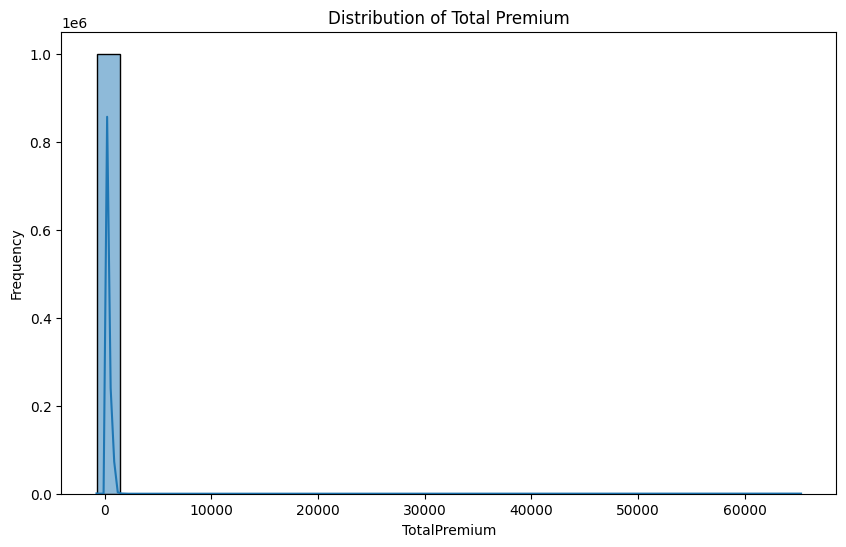

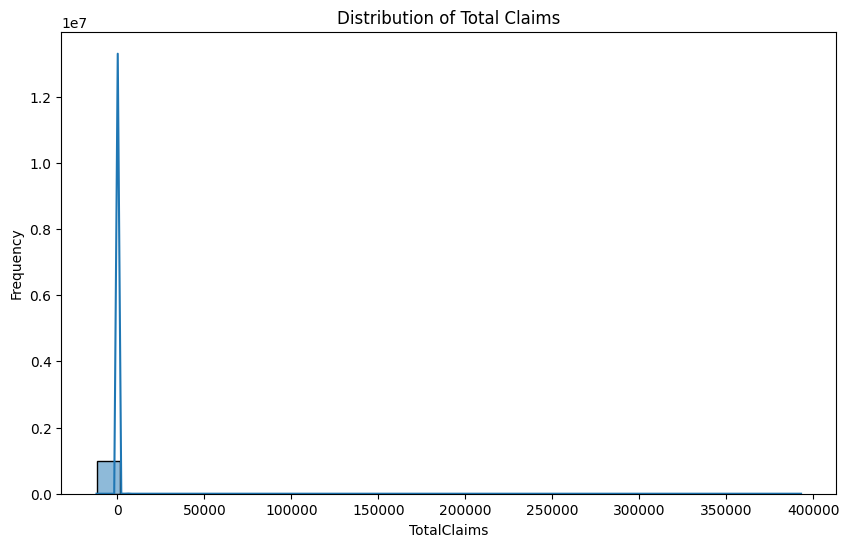

In [10]:
# Univariate Analysis
plot_histogram(df, 'TotalPremium', title='Distribution of Total Premium')
plot_histogram(df, 'TotalClaims', title='Distribution of Total Claims')

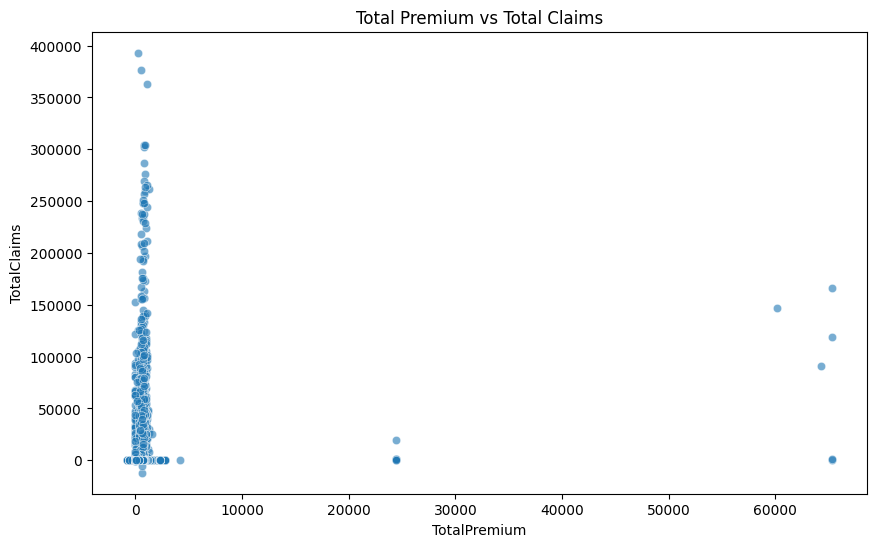

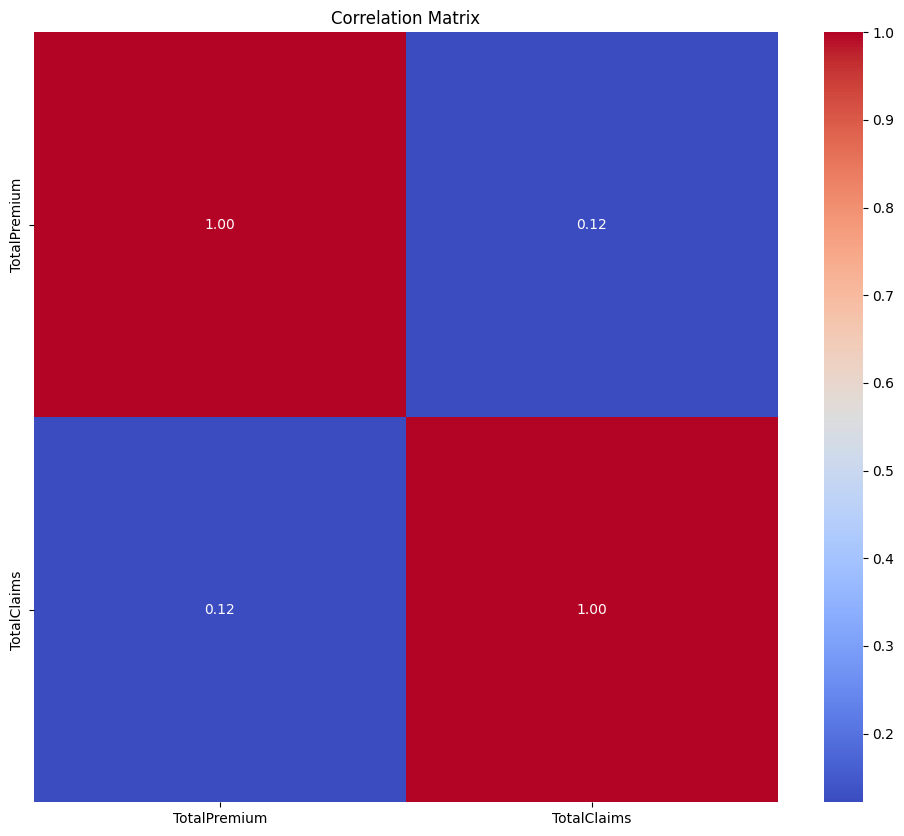

In [11]:
# Bivariate Analysis
plot_scatter(df, 'TotalPremium', 'TotalClaims', title='Total Premium vs Total Claims')
plot_correlation_matrix(df, ['TotalPremium', 'TotalClaims'])